In [68]:
from yellowbrick.cluster import KElbowVisualizer #Yellowbrick.cluster imported for Elbow Method

In [69]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
df=pd.read_csv("StudentsPerformance.csv")

In [71]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


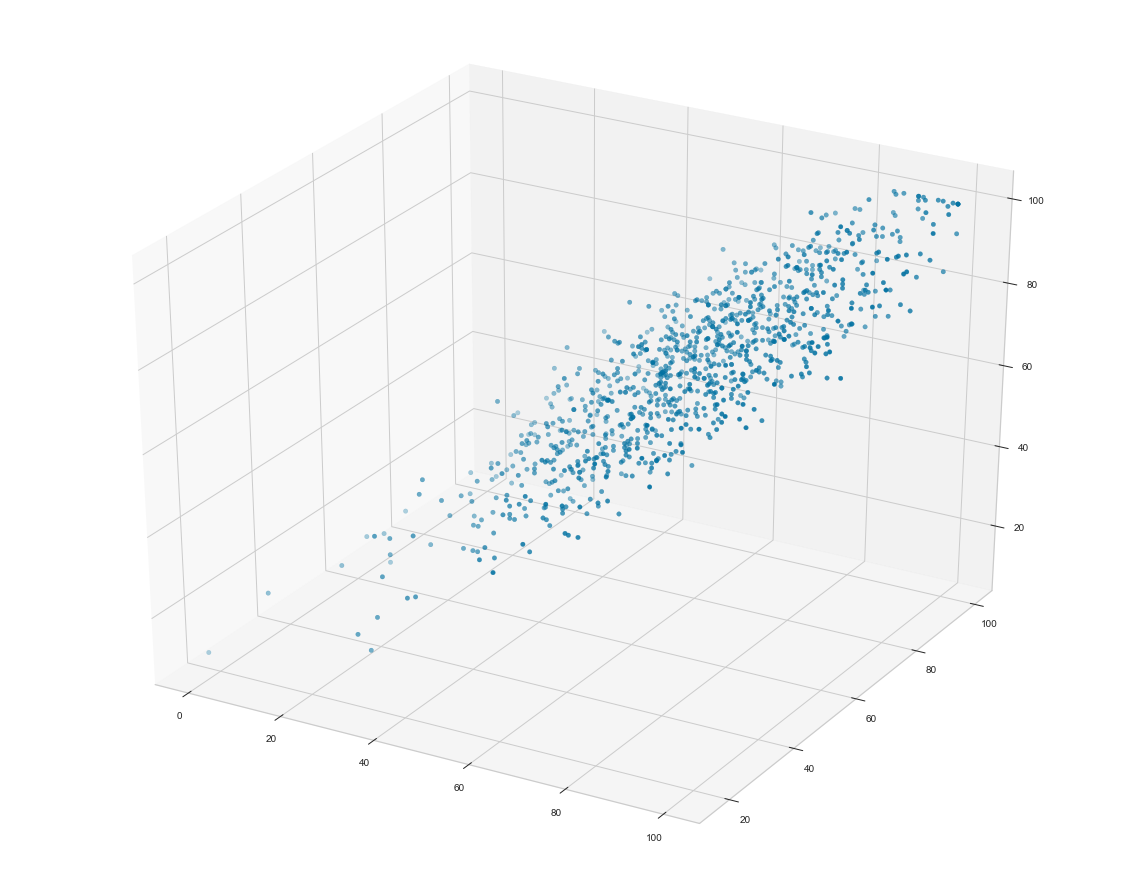

In [72]:
x = df['math score']
y = df['reading score']
z = df['writing score']
fig = plt.figure(figsize = (20, 16)) 
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z)


# KMEANS

In [73]:
model=KMeans()


In [74]:
visualizer = KElbowVisualizer(model, k=(4,12))

In [75]:
X=df[["math score","reading score","writing score"]]

In [76]:
X

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [11]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

H:\Anaconda\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
H:\Anaconda\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
H:\Anaconda\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002455F3444C8>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

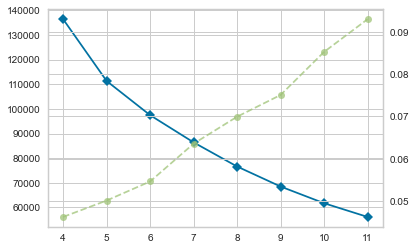

In [12]:
visualizer.fit(X)

In [13]:
model2=KMeans(n_clusters=5)

In [14]:
model2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
centroids = model2.cluster_centers_


In [16]:
centroids

array([[63.67595819, 66.61324042, 66.02090592],
       [86.05454545, 89.69090909, 89.16363636],
       [36.23728814, 39.55932203, 37.22033898],
       [73.78228782, 77.4095941 , 76.32841328],
       [52.66972477, 54.7706422 , 52.81192661]])

In [17]:
model2.score(X)

-111307.99410631639

In [18]:
len(model2.labels_)

1000

In [19]:
X

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [20]:
df['cluster']=model2.labels_

In [64]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg,cluster
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,0
1,female,group C,some college,standard,completed,69,90,88,82.333333,2
2,female,group B,master's degree,standard,none,90,95,93,92.666667,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,4
4,male,group C,some college,standard,none,76,78,75,76.333333,0
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,2
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,4
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,3
998,female,group D,some college,standard,completed,68,78,77,74.333333,0


# 2D K means graph

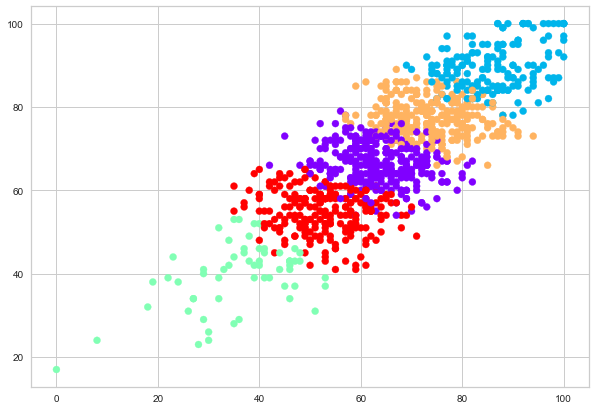

In [21]:
x = df['math score']
y = df['reading score']
z = df['writing score']
fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes()
ax.scatter(x, y, c=df['cluster'], cmap = 'rainbow')
plt.show()

# 3D KMEANS GRAPH

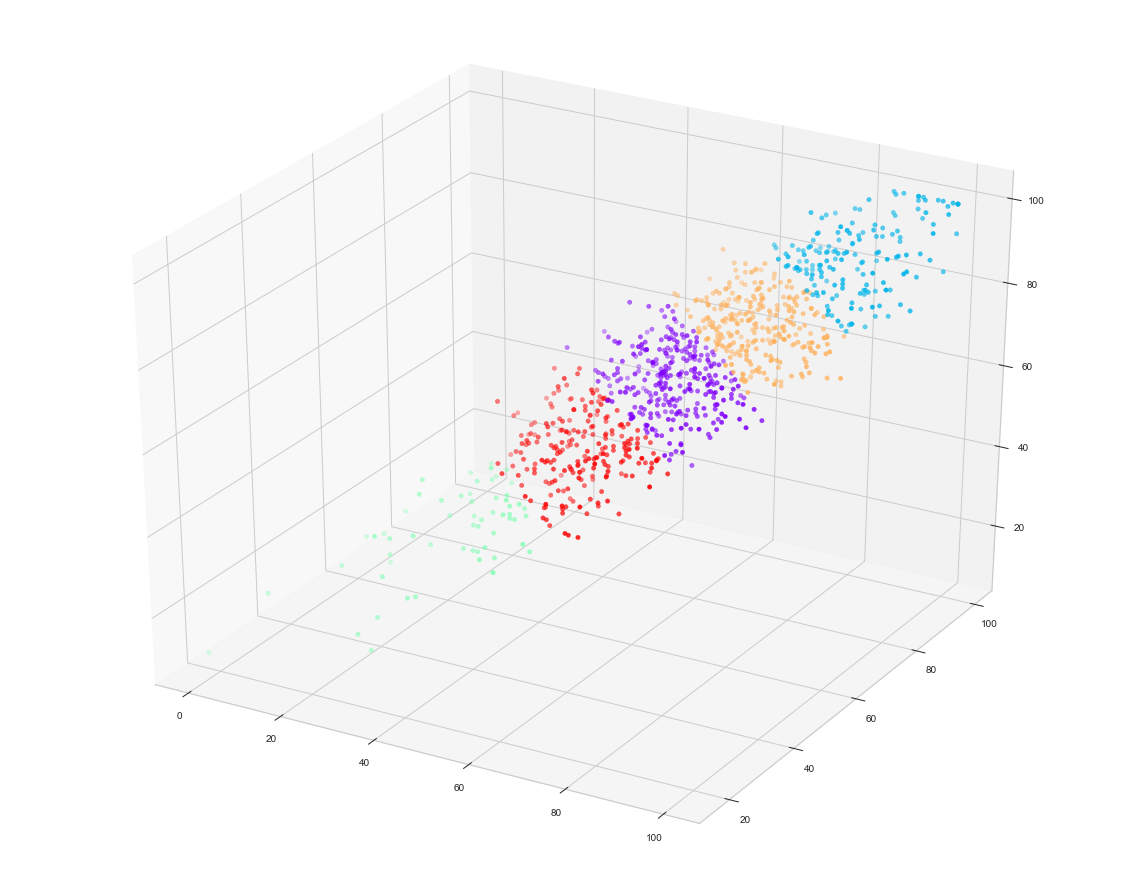

In [22]:
x = df['math score']
y = df['reading score']
z = df['writing score']
fig = plt.figure(figsize = (20, 16)) 
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z, c=df['cluster'], cmap = 'rainbow')


# Gender Graph

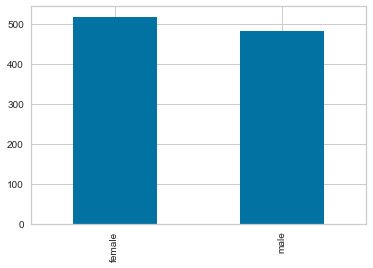

In [23]:
df['gender'].value_counts().plot.bar()

# Group Graph

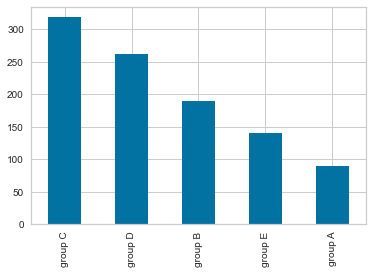

In [24]:
df['race/ethnicity'].value_counts().plot.bar()

# Heirarchical Clustering

In [25]:
data= df.iloc[:,5:8].values

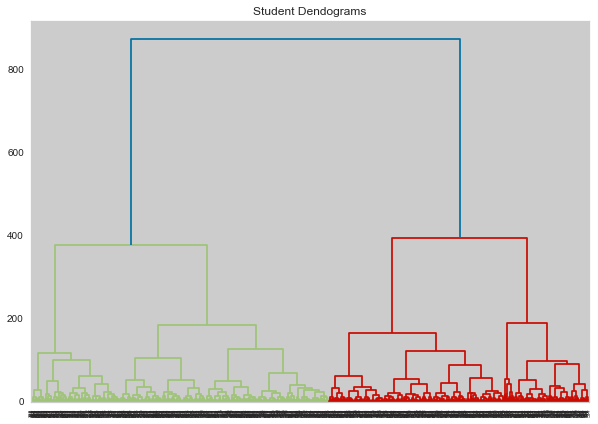

In [27]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Student Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [30]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([0, 1, 1, 3, 5, 0, 1, 3, 6, 3, 2, 3, 0, 5, 2, 0, 1, 4, 3, 2, 6, 0,
       3, 0, 0, 5, 2, 0, 6, 0, 0, 2, 2, 3, 1, 5, 0, 2, 1, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 0, 5, 3, 5, 3, 5, 1, 3, 1, 3, 2, 4, 5, 3, 2, 0, 2, 6,
       3, 0, 2, 3, 0, 2, 3, 2, 3, 3, 4, 5, 0, 6, 3, 3, 3, 6, 3, 0, 1, 0,
       2, 0, 0, 4, 0, 3, 1, 5, 6, 0, 2, 6, 5, 0, 1, 3, 1, 0, 1, 6, 0, 6,
       1, 2, 3, 2, 1, 5, 0, 5, 2, 2, 1, 1, 1, 2, 5, 1, 5, 0, 5, 3, 1, 3,
       5, 0, 5, 2, 3, 2, 2, 6, 5, 2, 3, 3, 5, 4, 1, 5, 0, 1, 6, 5, 2, 3,
       2, 1, 0, 2, 0, 6, 5, 1, 3, 3, 1, 1, 3, 0, 0, 0, 0, 1, 1, 6, 3, 1,
       2, 0, 2, 1, 0, 2, 3, 0, 3, 6, 5, 6, 3, 1, 6, 0, 6, 6, 0, 2, 2, 2,
       3, 5, 0, 0, 0, 2, 3, 0, 6, 5, 0, 2, 5, 4, 2, 2, 1, 5, 1, 3, 0, 2,
       0, 1, 2, 5, 0, 3, 5, 2, 6, 1, 6, 3, 0, 1, 5, 5, 6, 0, 3, 5, 5, 5,
       2, 3, 5, 5, 5, 2, 6, 2, 3, 0, 0, 5, 3, 0, 0, 5, 0, 0, 0, 5, 3, 1,
       5, 3, 0, 0, 1, 0, 6, 3, 2, 0, 1, 5, 1, 0, 0, 6, 3, 3, 0, 0, 3, 5,
       1, 0, 5, 5, 5, 5, 2, 0, 5, 6, 3, 0, 3, 1, 5,

# 2D Hierarchical 

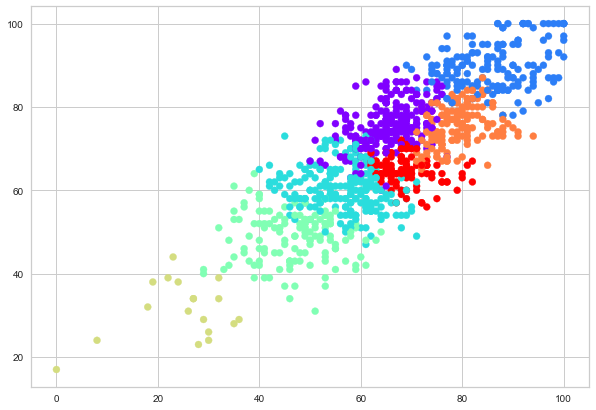

In [31]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

# DBSCAN

In [32]:
from sklearn.cluster import DBSCAN 


In [37]:
import math
math.log(1000)

6.907755278982137

In [ ]:
DBSCAN().

In [54]:
db_default = DBSCAN(eps = 0.0020, min_samples = 3).fit(data) 
labels = db_default.labels_ 

In [55]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [66]:
x

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

# 2D DBSCAN GRAPH

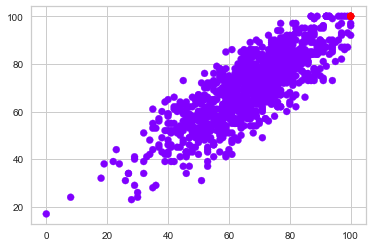

In [67]:

plt.scatter(data[:,0], data[:,1], c=labels, cmap='rainbow')
